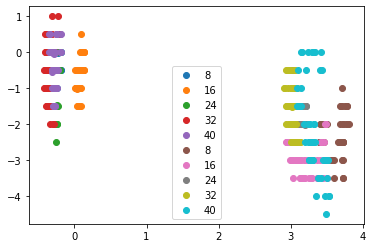

FileNotFoundError: [Errno 2] File D:\Atom\python\data\cleaned\grill\final\d10_oil_f_kde.csv does not exist: 'D:\\Atom\\python\\data\\cleaned\\grill\\final\\d10_oil_f_kde.csv'

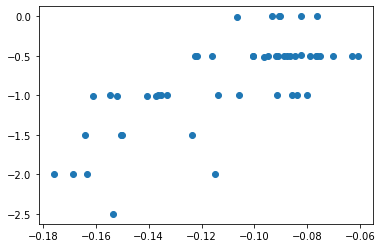

In [21]:
import os
import sys

sys.path.extend(['d:\\atom\\python'])

import data_manager as dm
import clean_data as cleaner

folder = 'D:\\Atom\\exp\\20210411\\angle'
ds = [101, 102, 103, 104, 105]

data = {}
## water
for d in ds:
    df_f = dm.import_from_file(os.path.join(folder, 'd%d_water_f.csv' % d), dm.epc_water)
    df_t = dm.import_from_file(os.path.join(folder, 'd%d_water_t.csv' % d), dm.epc_water)
    df_f = cleaner.kde_peak(df_f)
    df_t = cleaner.kde_peak(df_t)
    plt.scatter(np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE'])), df_f['RSSI'] - df_t['RSSI'])
    data['water_%d_p' % d] = np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE']))
    data['water_%d_r' % d] = df_f['RSSI'].values - df_t['RSSI'].values

# plt.legend(ds)
# plt.title('water')
# plt.show()

## oil
for d in ds:
    df_f = dm.import_from_file(os.path.join(folder, 'd%d_oil_f.csv' % d), dm.epc_oil)
    df_t = dm.import_from_file(os.path.join(folder, 'd%d_oil_t.csv' % d), dm.epc_oil)
    df_f = cleaner.kde_peak(df_f)
    df_t = cleaner.kde_peak(df_t)
    plt.scatter(np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE'])), df_f['RSSI'] - df_t['RSSI'], )
    
    data['oil_%d_p' % d] = np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE']))
    data['oil_%d_r' % d] = df_f['RSSI'].values - df_t['RSSI'].values

plt.legend([8, 16, 24, 32, 40, 8, 16, 24, 32, 40])
# plt.title('oil')
plt.show()

# import scipy.io
# scipy.io.savemat('rotation.mat', data)

import glob, os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

d_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
d_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_t_kde.csv'))
plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])


d_f = pd.read_csv(os.path.join(folder_clean, 'd10_oil_f_kde.csv'))
d_t = pd.read_csv(os.path.join(folder_clean, 'd10_oil_t_kde.csv'))
plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])

water 101 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water']
Correct 1.0
-------------------------------
water 102 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water']
Correct 1.0
-------------------------------
water 103 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'wa

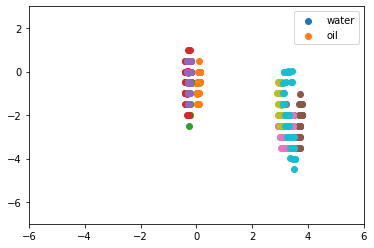

In [7]:
import os
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_all_nopi.joblib')

cnt = 0
correctcnt = 0

matls = ['water', 'oil']
dists = [101, 102, 103, 104, 105]
for matl in matls:
    for d in dists:
        df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
        diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
        diff_r = df_f['RSSI'] - df_t['RSSI']
        plt.scatter(diff_p, diff_r)
    #     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
        result = clf.predict(np.column_stack((diff_p, diff_r)))
        print(matl, d, result)
        correct = (result==matl).sum()
        print('Correct', correct/len(df_f))
        cnt += len(df_f)
        correctcnt += correct
        print('-------------------------------')
plt.legend(matls)
plt.xlim([-6, 6])
plt.ylim([-7, 3])
print(correctcnt, cnt, correctcnt/cnt)